#  <span style="color:blue">AutoML com Pycaret</span>


# Prática 07

Nesta aula prática vamos fazer a instalação do Pycaret e seguir um Pipeline de Machine Learning passando pelas principais funções para modelagem.

Nesta prática você vai aprender:

* **Carga dos dados:**  Como importar dados para utilizar o Pycaret.
* **Configuração do ambiente:**  Como configurar um experimento no Pycaret e iniciar a construção de modelos de regressão.
* **Criação de um modelo:**  Como criar um modelo, realizar cross validation e avaliar as métricas de regressão.
* **Otimização do modelo:**  Como automaticamente ajustar os hiperparametros de um modelo de regressão.
* **Análise de performance do modelo:**  Como analisar a performance do modelo utilizando gráficos.
* **Finalizar o modelo:** Como finalizar o melhor modelo e concluir o experimento.
* **Realizar predições:**  Como fazer predições para novos dados.
* **Salvar e Carregar o modelo:**  Como Salvar e Carregar o modelo para uso futuro.

#### Carregando o módulo de regressão.

In [37]:
from pycaret.regression import *
import pandas as pd
import seaborn as sns

# Conjunto de dados utilizado.

#### Carregando os dados.

In [38]:
dataset = pd.read_csv("datasets/volkswagen.csv")

In [39]:
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


Nesta prática vamos utilizar o dataset **volkswagen** disponível no Kaggle: https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes

Este conjunto de dados contém dados de veículos e o objetivo é estimar o preço baseado nas suas características. Segue abaixo os atributos do conjunto de dados.

- **model**: modelo do veículo.
- **year**: ano de fabricação.
- **price**: preço de venda do veículo.
- **transmission**: tipo de transmissão.
- **mileage**: total de milhas rodadas.
- **fueltype**: tipo de combustível aceito.
- **tax**: taxa de transito.
- **mpg**: milhas por galão.
- **enginesize**: tamanho do motor.

#### Verificando a forma dos dados.

In [40]:
dataset.shape

(15157, 9)

#### Verificando as informações dos atributos.

In [41]:
dataset.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


#### Listando registros missing por atributo.

In [43]:
dataset.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

#### Percentual de registros por modelo.

In [44]:
print(dataset["model"].value_counts() / len(dataset))

 Golf               0.320842
 Polo               0.216863
 Tiguan             0.116448
 Passat             0.060368
 Up                 0.058323
 T-Roc              0.048360
 Touareg            0.023949
 Touran             0.023224
 T-Cross            0.019793
 Golf SV            0.017682
 Sharan             0.017154
 Arteon             0.016362
 Scirocco           0.015966
 Amarok             0.007323
 Caravelle          0.006664
 CC                 0.006268
 Tiguan Allspace    0.006004
 Beetle             0.005476
 Shuttle            0.004025
 Caddy Maxi Life    0.003893
 Jetta              0.002111
 California         0.000990
 Caddy Life         0.000528
 Eos                0.000462
 Caddy              0.000396
 Fox                0.000264
 Caddy Maxi         0.000264
Name: model, dtype: float64


#### Quantitativo de registros por tipo de combustível.

In [45]:
dataset["fuelType"].value_counts()

Petrol    8553
Diesel    6372
Hybrid     145
Other       87
Name: fuelType, dtype: int64

#### Quantitativo de veículos por ano de fabricação.

<AxesSubplot:xlabel='count', ylabel='year'>

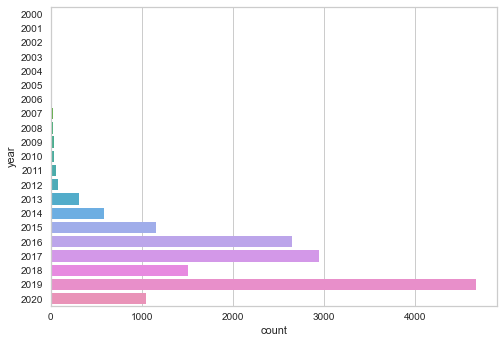

In [46]:
sns.countplot(y = dataset["year"])

#### Separando os dados de validação.

##### Selecionando 95% dos dados dados de forma aleatória.

In [47]:
data = dataset.sample(frac=0.95, random_state=786)

##### Atribuindo os 5% restante para o dataframe de validação.

In [48]:
data_validation = dataset.drop(data.index)

##### Excluindo os demais registros.

In [49]:
data.reset_index(inplace=True, drop=True)
data_validation.reset_index(inplace=True, drop=True)

##### Dados utilizados para modelagem e validação.

In [50]:
print('Dados para modelagem: ' + str(data.shape))
print('Dados reservados para a validação: ' + str(data_validation.shape))

Dados para modelagem: (14399, 9)
Dados reservados para a validação: (758, 9)


In [52]:
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


# Configurando o ambiente com a função Setup.

Inspecionando os dados para criar o pipeline de transformação.

In [53]:
exp_clf01 = setup(   data = data
                    ,experiment_name = "regressao01" 
                    ,target = 'price'
                    ,session_id = 123
                    ,profile = True
                 )

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Função Setup inicializa o ambiente no Pycaret e cria o pipeline de transformação e prepara os dados para modelagem e deploy.

In [54]:
exp_clf01 = setup(   data = data
                    ,experiment_name = "regressao01" 
                    ,target = 'price'
                    ,session_id = 123
                    ,profile = False
                    ,transform_target = True 
                    ,normalize = True
                    ,ignore_low_variance = True
                    ,combine_rare_levels = True
                    ,rare_level_threshold = 0.3
                    ,bin_numeric_features = ['tax']
                 )

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(14399, 9)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10079, 59)"


##### Armazenando o Dataframe transformado.

In [55]:
df_transformed = get_config("X_train")

In [56]:
df_transformed.head()

,mileage,mpg,engineSize,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caravelle,model_ Golf,model_ Golf SV,...,tax_13.0,tax_14.0,tax_2.0,tax_3.0,tax_4.0,tax_5.0,tax_6.0,tax_7.0,tax_8.0,tax_9.0
3933,0.573718,0.377724,0.874732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2124,1.388823,1.121089,0.005691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,-0.055714,-0.038560,-0.428830,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5927,-1.040123,-0.313605,0.005691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3488,-0.933170,-0.997500,-0.211570,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Comparando modelos

Esta função treina e compara a performance de todos os modelos para a tarefa de Regressão utilizando cross validation e retorna as métricas para avaliação e o tempo de treinamento.

In [57]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,1098.3941,2645086.9500,1624.9859,0.9552,0.0992,0.0689,2.1230
lightgbm,Light Gradient Boosting Machine,1151.6678,3104822.8683,1760.1138,0.9475,0.1035,0.0718,0.6950
rf,Random Forest Regressor,1151.9389,3181819.9816,1780.3371,0.9462,0.1099,0.0743,1.8750
knn,K Neighbors Regressor,1200.4988,3390189.1960,1838.6449,0.9427,0.1130,0.0780,0.0810
et,Extra Trees Regressor,1161.5288,3430625.8185,1842.9126,0.9420,0.1091,0.0735,1.8700
gbr,Gradient Boosting Regressor,1518.3930,4694343.5492,2166.0169,0.9205,0.1263,0.0955,0.7710
dt,Decision Tree Regressor,1414.8644,5002002.3022,2232.1850,0.9154,0.1389,0.0908,0.0440
br,Bayesian Ridge,1507.8615,5046402.0220,2244.7874,0.9146,0.1207,0.0900,0.0420
ridge,Ridge Regression,1508.2691,5069152.6500,2249.7676,0.9142,0.1206,0.0900,0.0310
huber,Huber Regressor,1497.1841,5416282.4049,2323.0229,0.9084,0.1216,0.0887,0.2380


##### Verificando o retorno da função.

In [58]:
print(best_model)

PowerTransformedTargetRegressor(base_score=None, booster='gbtree',
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, enable_categorical=False,
                                gamma=None, gpu_id=None, importance_type=None,
                                interaction_constraints=None,
                                learning_rate=None, max_delta_step=None,
                                max_depth=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
                                n_esti...
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       n_estimators=100,
                                                       n_jobs=-1,
       

# Criando o Modelo

Esta função treina o modelo especificado utilizando cross validation e retorna suas métricas.

In [59]:
model = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1043.6750,2337036.7500,1528.7369,0.9612,0.0972,0.0672
1,1079.7974,2444578.7500,1563.5149,0.9577,0.1042,0.0668
2,1152.2091,2827420.0000,1681.4934,0.9538,0.0918,0.0673
3,1161.0448,2867653.5000,1693.4148,0.9551,0.1089,0.0755
4,1118.3611,2668367.7500,1633.5139,0.9535,0.1162,0.0754
5,1078.2240,2546560.5000,1595.7947,0.9527,0.1011,0.0699
6,1104.1918,2849236.7500,1687.9683,0.9536,0.0922,0.0673
7,1067.2137,2406315.7500,1551.2303,0.9570,0.0865,0.0641
8,1083.0712,2497634.2500,1580.3905,0.9589,0.0902,0.0655
9,1096.1527,3006065.5000,1733.8009,0.9490,0.1033,0.0698


Verificando o objeto criado.

In [60]:
print(model)

PowerTransformedTargetRegressor(base_score=None, booster='gbtree',
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, enable_categorical=False,
                                gamma=None, gpu_id=None, importance_type=None,
                                interaction_constraints=None,
                                learning_rate=None, max_delta_step=None,
                                max_depth=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
                                n_esti...
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       n_estimators=100,
                                                       n_jobs=-1,
       

# Exibindo graficamente a performance do modelo

Com esta função podemos analisar a performance do modelo através de gráficos.

### Residuais Plot

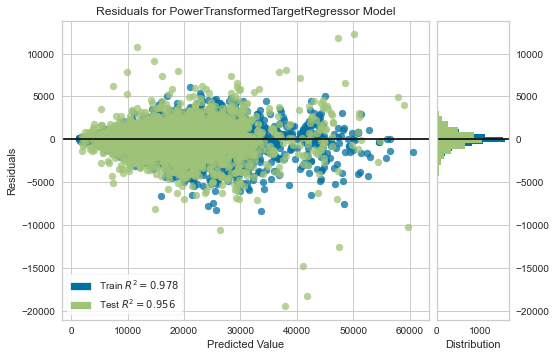

In [61]:
plot_model(model)

### Error Plot

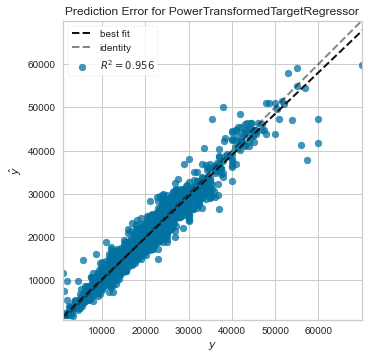

In [62]:
plot_model(model, plot = 'error')

A função evaluate_model exibe uma interface o usuário selecionar os gráficos disponíveis para um determinado modelo.

In [63]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Predict utilizando a amostra de teste.

Esta função realiza a predição utilizando o modelo especificado utilizando a amostra separada de teste.

In [64]:
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,1087.1155,2695627.7500,1641.8367,0.9561,0.1075,0.0718


,mileage,mpg,engineSize,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caravelle,model_ Golf,model_ Golf SV,...,tax_2.0,tax_3.0,tax_4.0,tax_5.0,tax_6.0,tax_7.0,tax_8.0,tax_9.0,price,Label
0,-0.118633,0.667636,0.874732,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17142.0,16894.166016
1,0.302206,0.771707,0.005691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15498.0,15317.963867
2,0.282893,0.377724,0.874732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17790.0,17592.685547
3,1.633194,-1.042102,0.874732,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17199.0,16458.062500
4,1.112092,0.199317,0.874732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15299.0,14681.587891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,-0.378757,0.377724,-1.297871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10595.0,11692.030273
4316,-0.791150,-0.722456,-1.297871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19490.0,19496.953125
4317,0.866677,0.466928,-0.863350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9995.0,10534.617188
4318,-0.521631,-0.558915,-0.428830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18240.0,19073.951172


# Predict utilizando os dados de validação.

In [65]:
validation_predictions = predict_model(model, data=data_validation)
validation_predictions.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Label
0,T-Roc,2020,31895,Manual,10,Petrol,145,42.2,1.5,25547.740234
1,T-Roc,2019,33785,Semi-Auto,2500,Petrol,145,32.5,2.0,32564.011719
2,T-Roc,2019,22230,Manual,3392,Diesel,145,50.4,2.0,22480.195312
3,T-Roc,2019,25990,Semi-Auto,2423,Diesel,145,49.6,2.0,24814.183594
4,T-Roc,2020,27990,Manual,322,Diesel,145,50.4,2.0,25148.138672


##### Verificando a performance do modelo aplicado aos dados de validação.

In [66]:
from pycaret.utils import check_metric
check_metric(validation_predictions.price, validation_predictions.Label, 'R2')

0.9668

# Finalize Model

Esta função treina o algoritmo e cria o modelo utilizando todo o conjunto de dados.

In [67]:
final_model = finalize_model(model)

In [68]:
print(final_model)

PowerTransformedTargetRegressor(base_score=None, booster='gbtree',
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, enable_categorical=False,
                                gamma=None, gpu_id=None, importance_type=None,
                                interaction_constraints=None,
                                learning_rate=None, max_delta_step=None,
                                max_depth=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
                                n_esti...
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       n_estimators=100,
                                                       n_jobs=-1,
       

# Save model

Esta função realiza a persistencia do modelo em disco.

In [69]:
save_model(final_model,'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                         missing=nan,
                                                                         monotone_constraints=None,
                                                                         n_estimators=100,
                                    

##### Verificando o arquivo em disco.

In [70]:
!ls

Final LGBM Model.pkl        mlruns
Final Model.pkl             model.pkl
apresentação.pdf            pre-processamento-02.ipynb
classificacao01.ipynb       pre-processamento-03.ipynb
clustering.ipynb            pre-processamento-04.ipynb
datasets                    pré-processamento-05.ipynb
kmeans_model.pkl            pré-processamento-06.ipynb
logs.log                    regressao.ipynb
material-apoio.zip          wine1_logs.csv
